### Intern-Academy Task 1:

- By **Riya Dhama**

<h2 align="center">Survival Prediction - Titanic Disaster </h2>

### Context 
- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### Objective

The Objective of Dataset is to predict whether a given passenger survived or not 

### About the dataset
- There are 1309 records and 12 attributes which are splitted in train and test set. Training set includes 819 records and 418 records are in Test Set. 
- The Survived column is Target Column. 

#### Data description :

- Survived : 0 = No, 1 = Yes
- pclass : Ticket class ie, 1 = 1st Class ( Upper ), 2 = 2nd Class ( Middle ), 3 = 3rd Class ( Lower )
- sex : 	Sex	(Gender)
- Age :	Age in years	
- sibsp	: The dataset defines family relations ( siblings / spouses aboard the Titanic ) ie, Sibling = brother, sister, stepbrother, stepsister & Spouse = husband, wife (mistresses and fiancés were ignored)
- parch	: The dataset defines family relations ( parents / children aboard the Titanic ) ie, 	Parent = mother, father & Child = daughter, son, stepdaughter, stepson
- ticket : 	Ticket number	
- fare : 	Passenger fare	
- cabin	: Cabin number	
- embarked	: Port of Embarkation ie, C = Cherbourg, Q = Queenstown, S = Southampton


#### Acknoweldgment : 
This dataset is taken from <a href="https://www.kaggle.com/c/titanic/data"> Kaggle  </a>

<hr>

### Importing essentials modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

### Loading Training Dataset

In [2]:
df = pd.read_csv('Dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Inspecting Data

In [3]:
df.shape

(891, 12)

- Training Dataset comprises 891 observations(rows) and 12 features(columns).
- Out of the 12, one is the target variable and rest 11 are input variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- The data has 2 float, 5 integer and 5 object attributes.
- There are some missing values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- We have many missing values, we try to fill missing vaues in Data-preprocessing step

### Statistical Summary
- Get a Statistical Overview using Describe

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- The attributes  "Age, SibSp, Parch, Fare" has large difference in their 75% and maximum value, which indicates the presence of outliers in the dataset.
- The attribute Fare has large difference in thier mean and median value. 

Observation :Thus, the observation suggest that there are extreme values i.e Outliers in our dataset.

### Exploratory Data Analysis

In [7]:
df1 = df.copy()

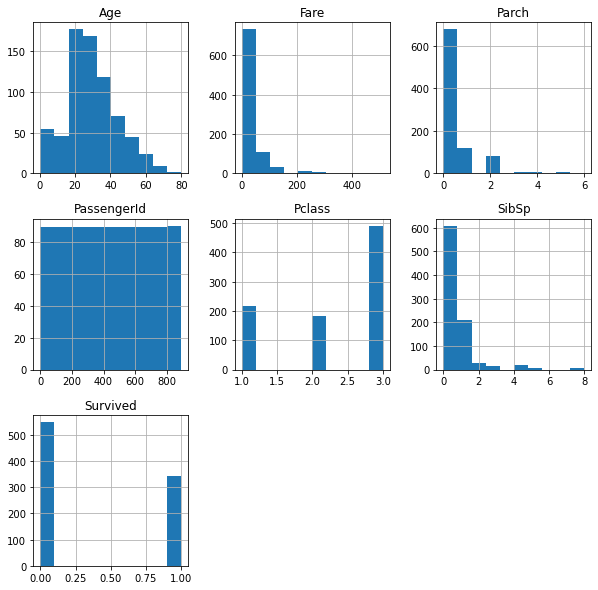

In [8]:
df1.hist(figsize=(10,10));

### Inference 
- Age attribute seems to be normally distributed.
- Fare, Parch, SibSp are positevely skewed ie shifted towards left. 
- Pclass attributes is label encoded having values range 1 to 3, and 3 has most number of observations
- Survived attribute is binary categocial (Target variable), in which 0 has most number of observation, ie most of the people died 
- PassengerID is irrelevent column 

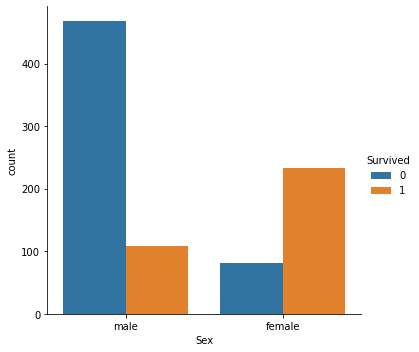

In [9]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = df1)

* It can be approximated that the survival rate of men is around 20% and that of women is around 75%. 

Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

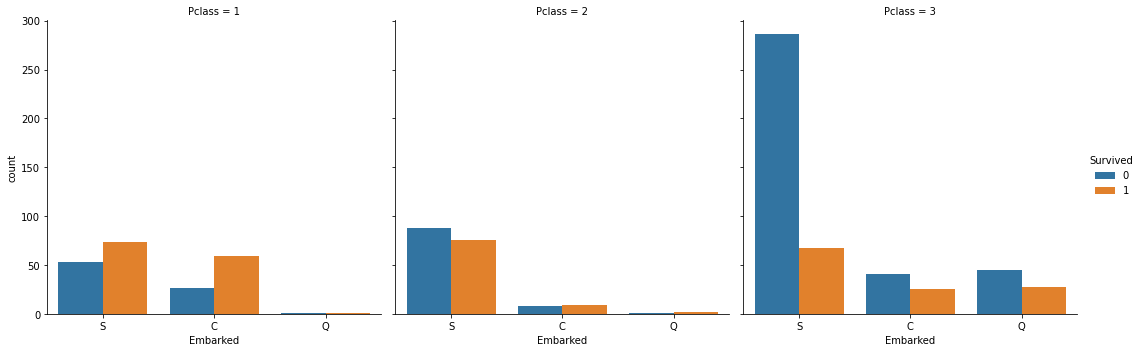

In [10]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = df1) 

- 

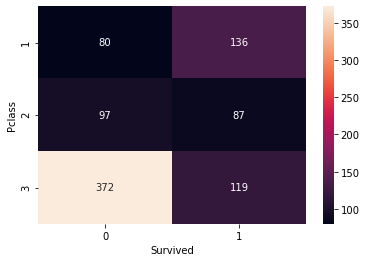

In [11]:
# Group the dataset by Pclass and Survived and then unstack them 
pclass_grp = df1.groupby(['Pclass', 'Survived']) 
pclass_survived = pclass_grp.size().unstack() 

sns.heatmap(pclass_survived, annot = True, fmt='d') 

- Higher-class passengers had more survival rate than the lower class ones or vice versa ie, Class 1 passengers have a higher survival chance compared to classes 2 and 3. 

It implies that Pclass contributes a lot to a passenger’s survival rate.

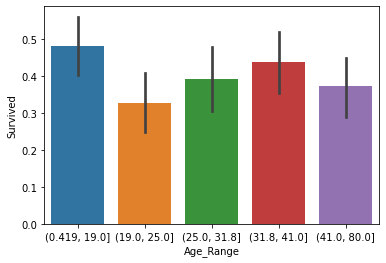

In [12]:
df1['Age_Range'] = pd.qcut(df1['Age'], 5) 
sns.barplot(x ='Age_Range', y ='Survived', data = df1) 

Age denotes the age of the passenger. As the values in this column are continuous, they need to be put in separate bins

- It can be concluded that childrens of age between 4 to 19 have given moe priority ,as  their survival rate is more as compared to others. 

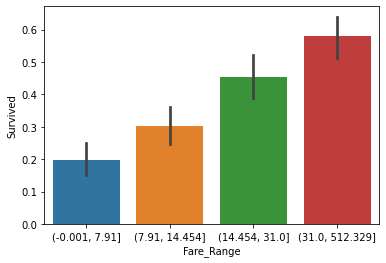

In [13]:
df1['Fare_Range'] = pd.qcut(df1['Fare'], 4) 
sns.barplot(x ='Fare_Range', y ='Survived', data = df1) 

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins

- It can be concluded that if a passenger paid a higher fare, the survival rate is more.

C:\Users\RAJEEV\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RAJEEV\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


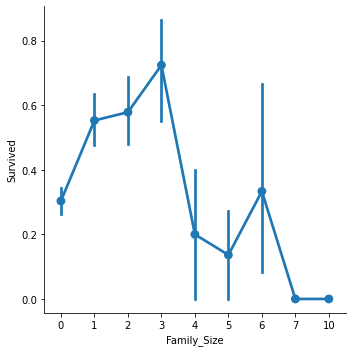

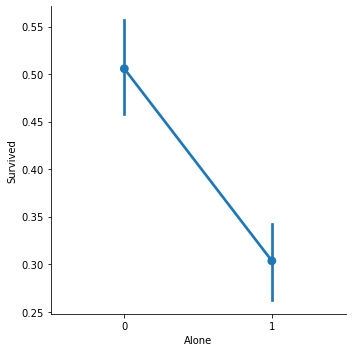

In [14]:
# Adding a column Family_Size 
df1['Family_Size'] = 0
df1['Family_Size'] = df1['Parch'] + df1['SibSp'] 

# Adding a column Alone 
df1['Alone'] = 0
df1.loc[df1.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size', y ='Survived', data =df1) 
# Factorplot for Alone 
sns.factorplot(x ='Alone', y ='Survived', data = df1) 

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of alone passenger against the one with a family.

Observation –
- If a passenger is alone, the survival rate is less. 
- If the family size is greater than 5, chances of survival decreases considerably.

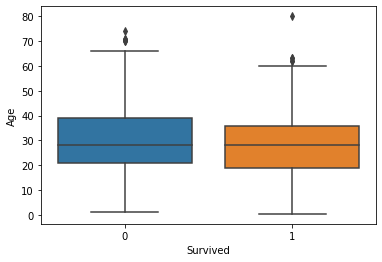

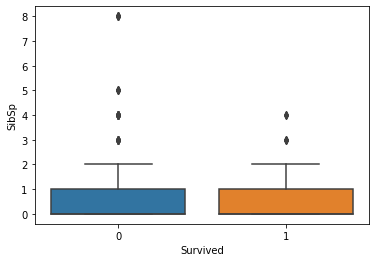

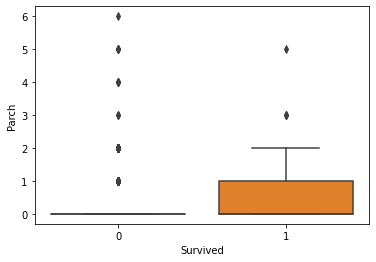

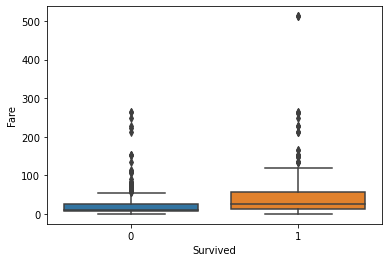

In [15]:
col = ['Age', 'SibSp', 'Parch', 'Fare']
for i in col:
    sns.boxplot(df['Survived'], df[i])
    plt.show()

- There are some outliers with respect to survived column. 

By statsical summary, we observe some outliers,  and graphical repsentation confirms the presnece of outliers. 


C:\Users\RAJEEV\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


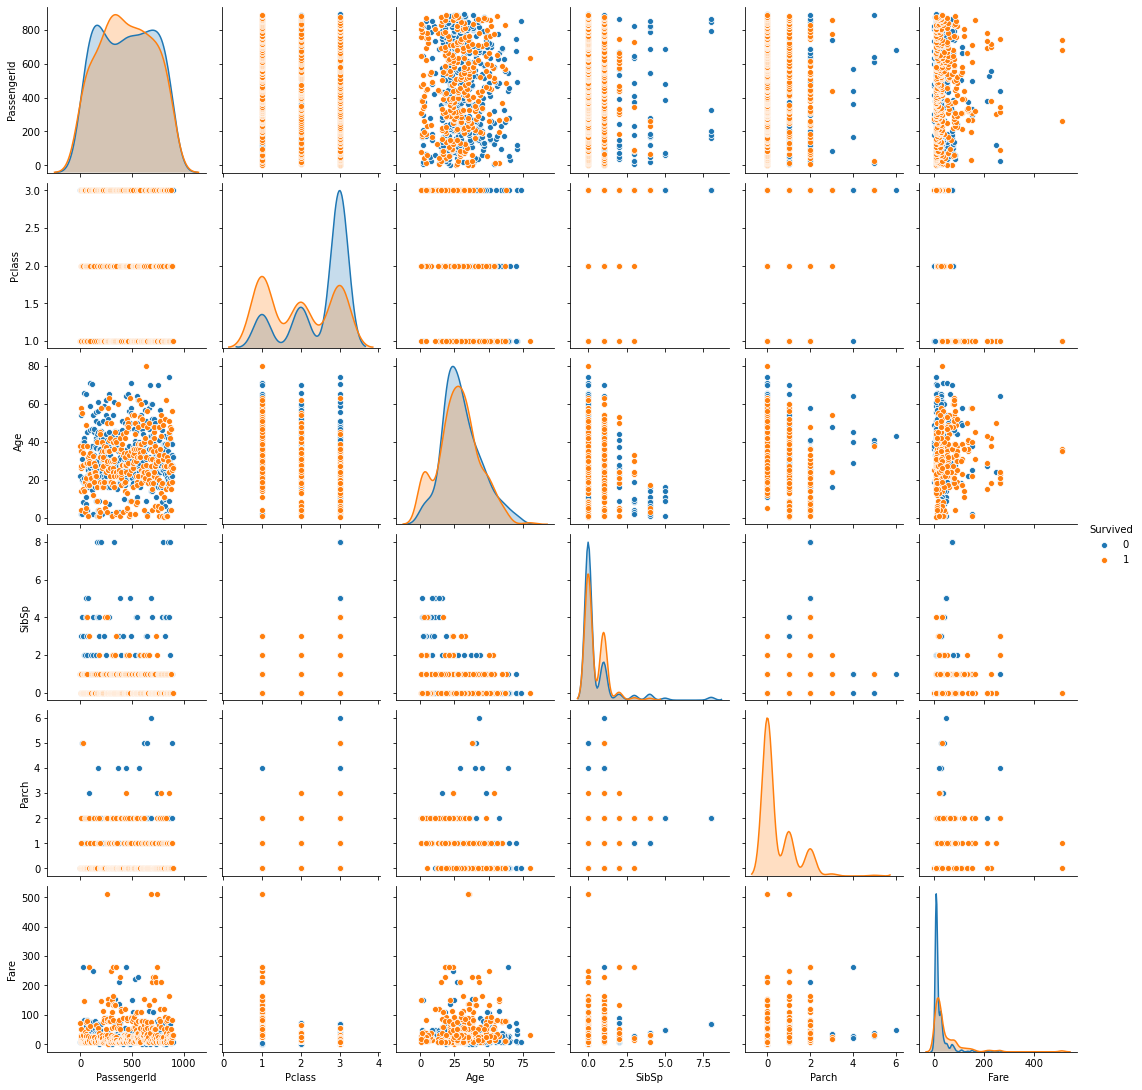

In [16]:
sns.pairplot(df, hue='Survived')

We observe some relations by pair plot , Lets Confirm the inter-correlation with the help of Heatmap 

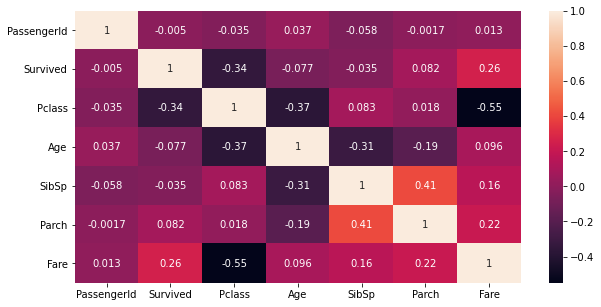

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

- The attribute Pclass and Fare has high Negative correlation with each other
- The attributes SibSp, Pclass has moderate Negative correlation with Age. 
- Survived (Target variable) has moderate Negative correlation with Pclass. 
- Survived (Target variable) has moderate Positvie correlation with Fare. 

### Data-preprocesing
1. Handling Missing values
2. Droping irrelevent columns
3. Convert categorical data into numerical form (One-Hot Encoding/Label Emcoder) 

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Filling Missing Values 

In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df['Age'].fillna(df['Age'].mean(), inplace= True)
df["Embarked"].fillna(df['Embarked'].mode()[0], inplace=True)

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
df['Cabin'].isnull().sum()/len(df)*100

77.10437710437711

* As the total 891 rows , In 'Cabin' there are more than 75% data is missing , so it is irrelevant to fill it 

#### Droping Irrelevent columns 

* Cabin attribute is more than 75% data missing, so irrelevent to fill. 
* As the name column contain different name and the Survival is not relevant to name. 
* PassengerId also doesn't make any impact on Survival 
* Ticket Number doesn't make any impact on Survival

In [23]:
df.drop(['PassengerId','Name','Cabin', 'Ticket'], axis=1, inplace=True)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


* Now data only conatin relevant columns

#### Converting Categorical variables to Numerical format 

In [25]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Spliting Data into Dependent Variable and Independent variable

In [26]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [27]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [28]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Split the data into train and test set 

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
print("Shape of Dataset ", df.shape)
print("Shape of Input Features ", x_train.shape, y_train.shape)
print("Shape of Output Features ", x_test.shape, y_test.shape)

Shape of Dataset  (891, 9)
Shape of Input Features  (668, 8) (668,)
Shape of Output Features  (223, 8) (223,)


<h2 align='center'> Logistic Regression </h2>

In [31]:
clf = LogisticRegression()

#Train Model
clf.fit(x_train, y_train)

C:\Users\RAJEEV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Prediction on Test and Train Set 
pred_logistic_test = clf.predict(x_test)
pred_logistic_train = clf.predict(x_train)

In [33]:
print("Training Accuracy: ", accuracy_score(y_train, pred_logistic_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_logistic_test))

Training Accuracy:  0.8038922155688623
Test Accuracy:  0.8026905829596412


In [34]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred_logistic_test))

print("\nClassification Report:")
print(classification_report(y_test, pred_logistic_test))

Confusion Matrix: 
[[115  19]
 [ 25  64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       134
           1       0.77      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



<h2 align='center'> Decision Tree </h2>

In [35]:
dt = DecisionTreeClassifier()

# Train model 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)

In [37]:
print("Training Accuracy: ", accuracy_score(y_train, pred_dt_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_dt_test))

Training Accuracy:  0.9820359281437125
Test Accuracy:  0.7757847533632287


In [38]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred_dt_test))

print("\nClassification Report:")
print(classification_report(y_test, pred_dt_test))

Confusion Matrix: 
[[113  21]
 [ 29  60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       134
           1       0.74      0.67      0.71        89

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223



<h2 align='center'> Random Forest </h2>

In [39]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
train_pred_rf = rf.predict(x_train)
pred_rf = rf.predict(x_test)

In [41]:
print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  0.9820359281437125
Test Accuracy:  0.7847533632286996


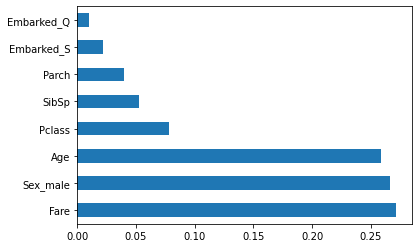

In [42]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [43]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, pred_rf))

Confusion Matrix: 
[[109  25]
 [ 23  66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       134
           1       0.73      0.74      0.73        89

    accuracy                           0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.78      0.79       223



In [44]:
from sklearn.model_selection import GridSearchCV
rf1 = RandomForestClassifier()

In [45]:
grid = { 'max_depth' :[3,5,8, None],
        'min_samples_split': [2,3],
        'max_features': [3,4,5], 
        'n_estimators' :[10,20,50,100]
}

grid_cv = GridSearchCV(estimator=rf1,
                       param_grid= grid,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=5,
                        return_train_score=True
                      )
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   38.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, None],
                         'max_features': [3, 4, 5], 'min_samples_split': [2, 3],
                         'n_estimators': [10, 20, 50, 100]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [46]:
grid_cv.best_params_

{'max_depth': 5, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 50}

In [47]:
grid_cv.best_score_

0.8323083828975424

In [48]:
rf2 = grid_cv.best_estimator_

# Training Model
rf2.fit(x_train, y_train)

# Prediction 
rf2_pred_train = rf2.predict(x_train)
rf2_pred = rf2.predict(x_test)

In [49]:
print("Training Accuracy: ", accuracy_score(y_train, rf2_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, rf2_pred))

Training Accuracy:  0.8667664670658682
Test Accuracy:  0.8161434977578476


In [50]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, rf2_pred))

print("\nClassification Report:")
print(classification_report(y_test, rf2_pred))

Confusion Matrix: 
[[120  14]
 [ 27  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       134
           1       0.82      0.70      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223



<h2 align='center'> Gradient Boost </h2>

In [51]:
gb = GradientBoostingClassifier()

# Training model
gb.fit(x_train, y_train)

# Prediction on test and train set
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

In [52]:
print("Training Accuracy: ",accuracy_score(y_train, gb_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

Training Accuracy:  0.8997005988023952
Test Accuracy:  0.820627802690583


In [53]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, gb_pred))

print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

Confusion Matrix: 
[[120  14]
 [ 26  63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       134
           1       0.82      0.71      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [54]:
gb1 = GradientBoostingClassifier()

In [55]:
grid = { 'max_depth' :[3,5,8, None],
        'min_samples_split': [2,3],
        'learning_rate' :[ 0.01,0.03, 0.1, 0.3 ], 
        'n_estimators' :[10,20,50,100,250]
}

grid_cv = GridSearchCV(estimator= gb1,
                       param_grid= grid,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=5,
                        return_train_score=True
                      )
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.1, 0.3],
                         'max_depth': [3, 5, 8, None],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 20, 50, 100, 250]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [56]:
grid_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 3,
 'n_estimators': 250}

In [57]:
grid_cv.best_score_

0.8204129727303332

In [58]:
gb1 = grid_cv.best_estimator_

#Train model :
gb1.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_split=3, n_estimators=250)

In [59]:
gb1_pred_train = gb1.predict(x_train)
gb1_pred = gb1.predict(x_test)

In [60]:
print("Training Accuracy: ",accuracy_score(y_train, gb1_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, gb1_pred))

Training Accuracy:  0.9476047904191617
Test Accuracy:  0.8340807174887892


In [61]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, gb1_pred))

print("\nClassification Report:")
print(classification_report(y_test, gb1_pred))

Confusion Matrix: 
[[116  18]
 [ 19  70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       134
           1       0.80      0.79      0.79        89

    accuracy                           0.83       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.83      0.83      0.83       223



<h2 align='center'> XG Boost </h2>

In [62]:
xg = xgb.XGBClassifier()

# Training model
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
# prediction on train and test set
xg_pred_train = xg.predict(x_train)
xg_pred = xg.predict(x_test)

In [64]:
print("Training Accuracy: ",accuracy_score(y_train, xg_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, xg_pred))

Training Accuracy:  0.968562874251497
Test Accuracy:  0.7937219730941704


In [65]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, xg_pred))

print("\nClassification Report:")
print(classification_report(y_test, xg_pred))

Confusion Matrix: 
[[111  23]
 [ 23  66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       134
           1       0.74      0.74      0.74        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [66]:
xg1 = xgb.XGBClassifier()

In [67]:
grid = { 'max_depth' :[3,5,8, None],
        'min_samples_split': [2,3],
        'learning_rate' :[ 0.01,0.03, 0.1, 0.3 ], 
        'n_estimators' :[10,20,50,100,250], 
        'colsample_bytree': [0.6,0.8],
        'subsample' :[0.9, 1]
}

grid_cv = GridSearchCV(estimator= xg1,
                       param_grid= grid,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=5,
                        return_train_score=True
                      )
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1020 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1668 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 2460 tasks      | elapsed:  1.0min


[09:31:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:  1.4min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [68]:
grid_cv.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.3,
 'max_depth': 8,
 'min_samples_split': 2,
 'n_estimators': 20,
 'subsample': 0.9}

In [69]:
grid_cv.best_score_

0.8383570867467174

In [70]:
xg1 = grid_cv.best_estimator_

# Training Model
xg1.fit(x_train, y_train)

[09:31:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, min_samples_split=2, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [71]:
xg_pred_train = xg1.predict(x_train)
xg_pred = xg1.predict(x_test)

In [72]:
print("Training Accuracy: ",accuracy_score(y_train, xg_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, xg_pred))

Training Accuracy:  0.9251497005988024
Test Accuracy:  0.8385650224215246


In [73]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, xg_pred))

print("\nClassification Report:")
print(classification_report(y_test, xg_pred))

Confusion Matrix: 
[[117  17]
 [ 19  70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       134
           1       0.80      0.79      0.80        89

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



<h2 align='center'> Navive Bayes </h2>

In [74]:
nb = BernoulliNB()

# Training model
nb.fit(x_train, y_train)

BernoulliNB()

In [75]:
# prediction on train and test set
nb_pred_train = nb.predict(x_train)
nb_pred = nb.predict(x_test)

In [76]:
print("Training Accuracy: ",accuracy_score(y_train, nb_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, nb_pred))

Training Accuracy:  0.7874251497005988
Test Accuracy:  0.7847533632286996


In [77]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, nb_pred))

print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

Confusion Matrix: 
[[112  22]
 [ 26  63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.74      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



<h2 align='center'> K-Nearest Neighbors </h2>

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [79]:
sc_input = sc.fit_transform(df.drop(['Survived'], axis = 1))
sc_input

array([[ 0.82737724, -0.5924806 ,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.63878901,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.17706291, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.62380254]])

In [80]:
df_input = pd.DataFrame(sc_input, columns= df.columns[1:])
df_input

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.615838
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,-1.355574,-0.307562,0.615838
888,0.827377,0.000000,0.432793,2.008933,-0.176263,-1.355574,-0.307562,0.615838
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,0.737695,-0.307562,-1.623803


In [81]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(df_input, df['Survived'], test_size=0.30)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [83]:
knn_pred_train = knn.predict(X_train_scaled)
knn_pred = knn.predict(X_test_scaled)

In [84]:
print("Training Accuracy: ",accuracy_score(Y_train, knn_pred_train))
print("Test Accuracy: ",accuracy_score(Y_test, knn_pred))

Training Accuracy:  0.9823434991974318
Test Accuracy:  0.7388059701492538


In [85]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, knn_pred))

print("\nClassification Report:")
print(classification_report(Y_test, knn_pred))

Confusion Matrix: 
[[123  36]
 [ 34  75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       159
           1       0.68      0.69      0.68       109

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



In [86]:
from sklearn.model_selection import cross_val_score
accuracy_rate = [ ]
for i in range(1,40):
    k = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(k, df_input, df['Survived'], cv=10)
    accuracy_rate.append(score.mean())

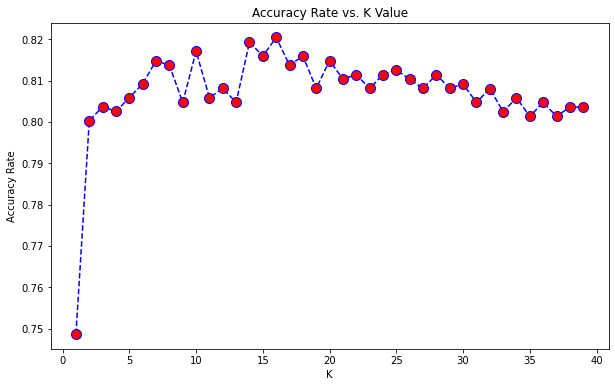

In [87]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [88]:
error_rate = [ ]
for i in range(1,40):
    k = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(k, df_input , df['Survived'], cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

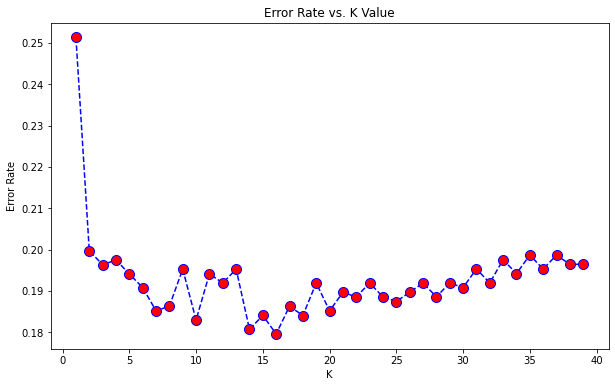

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

- when k = 16 there is least error and after that error keeps on increasing

In [90]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train_scaled,Y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=16')
print('\n')
print("Test Accuracy: ",accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print('\n')
print(classification_report(Y_test, pred))

WITH K=16


Test Accuracy:  0.7985074626865671
[[141  18]
 [ 36  73]]


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       159
           1       0.80      0.67      0.73       109

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268



<h2 align='center'> Support Vector Machine (SVM) </h2>

In [91]:
svc = svm.SVC(gamma = 0.01, C = 100)
svc.fit(X_train_scaled, Y_train)

SVC(C=100, gamma=0.01)

In [92]:
svc_pred_train = svc.predict(X_train_scaled)
svc_pred = svc.predict(X_test_scaled)

In [93]:
print("Training Accuracy: ",accuracy_score(Y_train, svc_pred_train))
print("Test Accuracy: ",accuracy_score(Y_test, svc_pred))

Training Accuracy:  0.8443017656500803
Test Accuracy:  0.8134328358208955


In [94]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, svc_pred))

print("\nClassification Report:")
print(classification_report(Y_test, svc_pred))

Confusion Matrix: 
[[139  20]
 [ 30  79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       159
           1       0.80      0.72      0.76       109

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



<h2 align='center'> ADA-BOOST </h2>

In [95]:
ada = AdaBoostClassifier(base_estimator = rf1, n_estimators=50)
ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [96]:
ada_pred_train = ada.predict(x_train)
ada_pred = ada.predict(x_test)

In [97]:
print("Training Accuracy: ",accuracy_score(y_train, ada_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, ada_pred))

Training Accuracy:  0.9820359281437125
Test Accuracy:  0.7937219730941704


In [98]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, ada_pred))

print("\nClassification Report:")
print(classification_report(y_test, ada_pred))

Confusion Matrix: 
[[112  22]
 [ 24  65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       134
           1       0.75      0.73      0.74        89

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



<h2 align='center'> Extra Tree  </h2>

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train, y_train)

ExtraTreesClassifier()

In [101]:
et_pred_train = et.predict(x_train)
et_pred = et.predict(x_test)

In [102]:
print("Training Accuracy: ",accuracy_score(y_train, et_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, et_pred))

Training Accuracy:  0.9820359281437125
Test Accuracy:  0.7982062780269058


In [103]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, et_pred))

print("\nClassification Report:")
print(classification_report(y_test, et_pred))

Confusion Matrix: 
[[110  24]
 [ 21  68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       134
           1       0.74      0.76      0.75        89

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [104]:
scores = {'Algorithms' :[ 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost',
                       'XG Boost', 'KNN', 'SVM', 'Naive Bayes', 'Ada Boost', 'Extra Tree'], 
        'Test Accuracy' : [accuracy_score(y_test, pred_logistic_test), 
                           accuracy_score(y_test, pred_dt_test), 
                           accuracy_score(y_test, rf2_pred),
                           accuracy_score(y_test, gb1_pred), 
                           accuracy_score(y_test, xg_pred), 
                           accuracy_score(Y_test, pred), 
                           accuracy_score(Y_test, svc_pred) ,
                           accuracy_score(y_test, nb_pred), 
                           accuracy_score(y_test, ada_pred), 
                           accuracy_score(y_test, et_pred) ] }
result_trained = pd.DataFrame(scores).sort_values(by='Test Accuracy', ascending=False)
result_trained

,Algorithms,Test Accuracy
4,XG Boost,0.838565
3,Gradient Boost,0.834081
2,Random Forest,0.816143
6,SVM,0.813433
0,Logistic Regression,0.802691
5,KNN,0.798507
9,Extra Tree,0.798206
8,Ada Boost,0.793722
7,Naive Bayes,0.784753
1,Decision Tree,0.775785


<h2 align='center'> Prediction on Test Data </h2>

In [105]:
test_data = pd.read_csv('Dataset/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [106]:
test = test_data.copy()

## Cleaning test data

In [107]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [108]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [109]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [110]:
test.drop(['Name','PassengerId','Ticket', 'Cabin'], axis=1, inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [111]:
test = pd.get_dummies(test, drop_first=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


## Prediction

In [112]:
# LOGISTIC 
y_pred_log = clf.predict(test)
# DECISION TREE
y_pred_dt = dt.predict(test)
# RANDOM FOREST
y_pred_rf = rf2.predict(test)
# SUPPORT VECTOR
y_pred_svm = svc.predict(test)
# KNN 
y_pred_knn = knn.predict(test)
# GRADIENT BOOST
y_pred_gb = gb.predict(test)
# XG BOOST
y_pred_xg = xg1.predict(test)
# NAIVE BAYES
y_pred_nb =  nb.predict(test)
# ADA BOOST
y_pred_ada = ada.predict(test)
# EXTRA TREES
y_pred_et = et.predict(test)

In [113]:
# just to confirm the length of predicted output
len(y_pred_log)

418

### LOGISTIC REGRESSION 

In [114]:
pred_log = pd.DataFrame(y_pred_log, columns=['Survived'])
pred_log.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [115]:
data = [test_data["PassengerId"], pred_log["Survived"]]
final_data = pd.concat(data, axis=1)
final_data.to_csv("titanic_pred_logistic.csv", index=False)

<h3 align='center'> Test accuracy of logistic regression : 0.76555 </h3>

<hr>

### RANDOM FOREST

In [116]:
pred_rf = pd.DataFrame(y_pred_rf, columns=['Survived'])
pred_rf.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [117]:
data_rf = [ test_data["PassengerId"], pred_rf["Survived"] ]
final_data_rf = pd.concat(data_rf, axis=1)
final_data_rf.to_csv("titanic_pred_RandomForest.csv", index=False)

<h3 align='center'> Test accuracy of RandomForest : 0.77272  </h3>

<hr> 

### DECISION TREE 

In [118]:
pred_dt = pd.DataFrame(y_pred_dt, columns=['Survived'])

data_dt = [ test_data["PassengerId"], pred_dt["Survived"] ]
final_data_dt = pd.concat(data_dt, axis=1)

final_data_dt.to_csv("titanic_pred_DecisionTree.csv", index=False)

<h3 align='center'> Test accuracy of DecisionTree : 0.72966  </h3>

<hr>

### SUPPORT VECTOR MACHINE(SVM)

In [119]:
pred_svm = pd.DataFrame(y_pred_svm, columns=['Survived'])

data_svm = [ test_data["PassengerId"], pred_svm["Survived"] ]
final_data_svm = pd.concat(data_svm, axis=1)

final_data_svm.to_csv("titanic_pred_SVM.csv", index=False)

<h3 align='center'> Test accuracy of SVM : 0.37559</h3>

<hr>

### K-NEAREST NEIGHBOURS(KNN)

In [120]:
pred_knn = pd.DataFrame(y_pred_knn, columns=['Survived'])

data_knn = [ test_data["PassengerId"], pred_knn["Survived"] ]
final_data_knn = pd.concat(data_knn, axis=1)

final_data_knn.to_csv("titanic_pred_KNN.csv", index=False)

<h3 align='center'> Test accuracy of KNN : 0.61961  </h3>

<hr>

### GRADIENT BOOST 

In [121]:
pred_gb = pd.DataFrame(y_pred_gb, columns=['Survived'])

data_gb = [ test_data["PassengerId"], pred_gb["Survived"] ]
final_data_gb = pd.concat(data_gb, axis=1)

final_data_gb.to_csv("titanic_pred_GradientBoost.csv", index=False)

<h3 align='center'> Test accuracy of GradientBoost : 0.78708  </h3>

<hr> 


### XG-BOOST  

In [122]:
pred_xg = pd.DataFrame(y_pred_xg, columns=['Survived'])

data_xg = [ test_data["PassengerId"], pred_xg["Survived"] ]
final_data_xg = pd.concat(data_xg, axis=1)

final_data_xg.to_csv("titanic_pred_XGBoost.csv", index=False)

<h3 align='center'> Test accuracy of XG BOOST : 0.75358  </h3>

<hr>

### NAIVE BAYES

In [123]:
pred_nb = pd.DataFrame(y_pred_nb, columns=['Survived'])

data_nb = [ test_data["PassengerId"], pred_nb["Survived"] ]
final_data_nb = pd.concat(data_nb, axis=1)

final_data_nb.to_csv("titanic_pred_NaiveByaes.csv", index=False)

<h3 align='center'> Test accuracy of NaiveBayes : 0.76555  </h3>

<hr>

### ADA BOOST 

In [124]:
pred_ada = pd.DataFrame(y_pred_ada, columns=['Survived'])

data_ada = [ test_data["PassengerId"], pred_ada["Survived"] ]
final_data_ada = pd.concat(data_ada, axis=1)
final_data_ada.to_csv("titanic_pred_AdaBoost.csv", index=False)

<h3 align='center'> Test accuracy of AdaBoost : 0.75837  </h3>

<hr>

### EXTRA TREES 

In [125]:
pred_et = pd.DataFrame(y_pred_et, columns=['Survived'])

data_et = [ test_data["PassengerId"], pred_et["Survived"] ]
final_data_et = pd.concat(data_et, axis=1)

final_data_et.to_csv("titanic_pred_ExtraTree.csv", index=False)

<h3 align='center'> Test accuracy of ExtraTrees : 0.77511  </h3>

<hr>

In [126]:
test_score = {'Algorithms' : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost',
                       'XG Boost', 'KNN', 'SVM', 'Naive Bayes', 'Ada Boost', 'Extra Tree'], 
        'Test Accuracy' : [0.76555, 0.72966, 0.77272,  0.78708,  0.75358,  0.61961, 0.37559, 0.76555, 0.75837, 0.77511 ]
             }
test_result = pd.DataFrame(test_score).sort_values(by='Test Accuracy', ascending=False)
test_result

,Algorithms,Test Accuracy
3,Gradient Boost,0.78708
9,Extra Tree,0.77511
2,Random Forest,0.77272
0,Logistic Regression,0.76555
7,Naive Bayes,0.76555
8,Ada Boost,0.75837
4,XG Boost,0.75358
1,Decision Tree,0.72966
5,KNN,0.61961
6,SVM,0.37559


<h2 align='center'> Conclusion </h2>

### Result: 
- Gradient Boost gives the best accuracy on test dataset among all the models
- SVM gives the least accuracy on test datsset

GradientBoost is 79% accurate in predicting survival of passengers. 